# The Sparks Foundation

# GRIP Internship - Data Science and Business Analytics

# Author - Abhinav Sharma

# Task 2 - Prediction using Unsupervised ML

### Dataset : https://bit.ly/3kXTdox 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

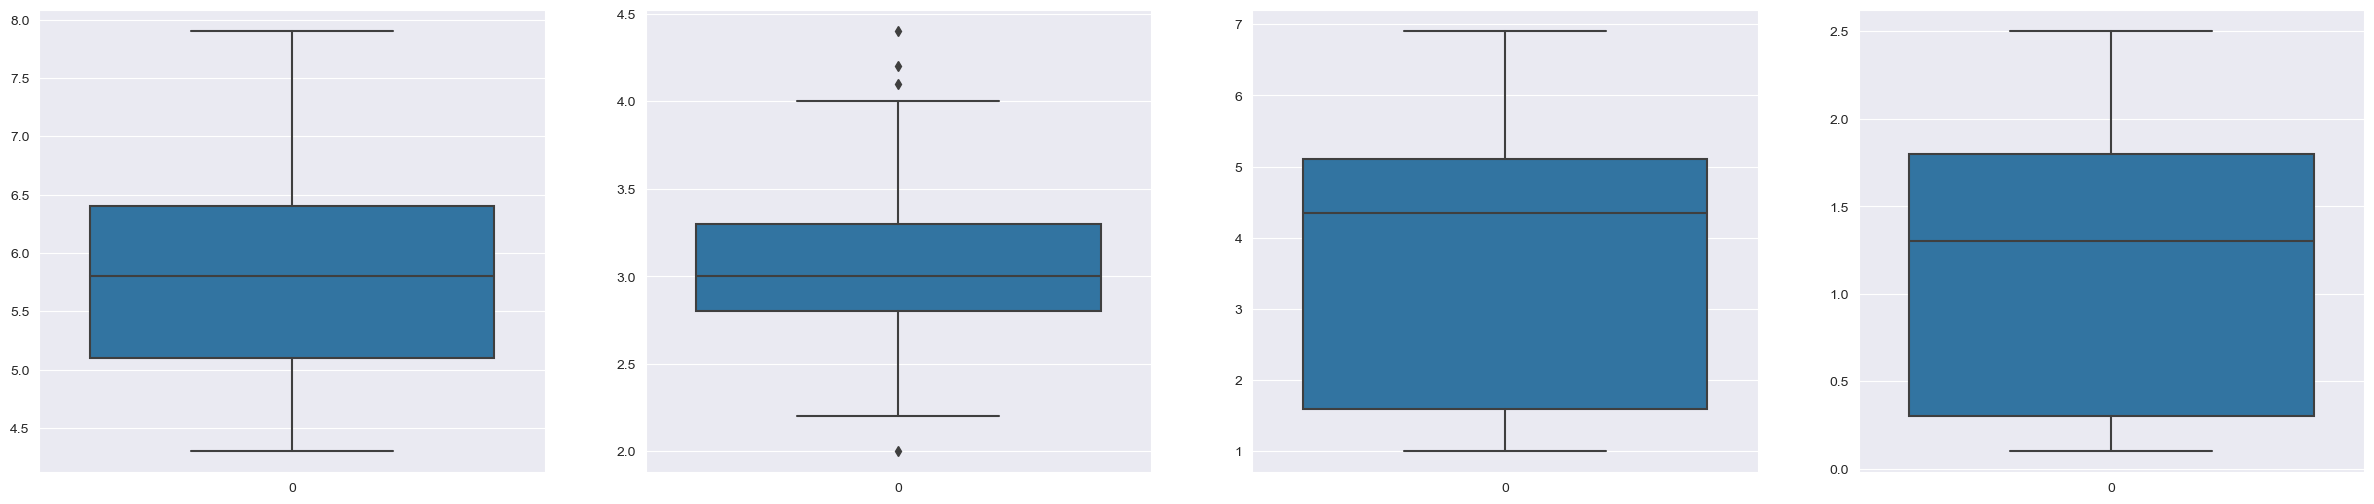

In [11]:
plt.figure(figsize=(30,6))

plt.subplot(1,4,1)
sns.boxplot(df["SepalLengthCm"])

plt.subplot(1,4,2)
sns.boxplot(df["SepalWidthCm"])

plt.subplot(1,4,3)
sns.boxplot(df["PetalLengthCm"])

plt.subplot(1,4,4)
sns.boxplot(df["PetalWidthCm"])

plt.show()


In [12]:
cols=df.iloc[:,1:5]
cols.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


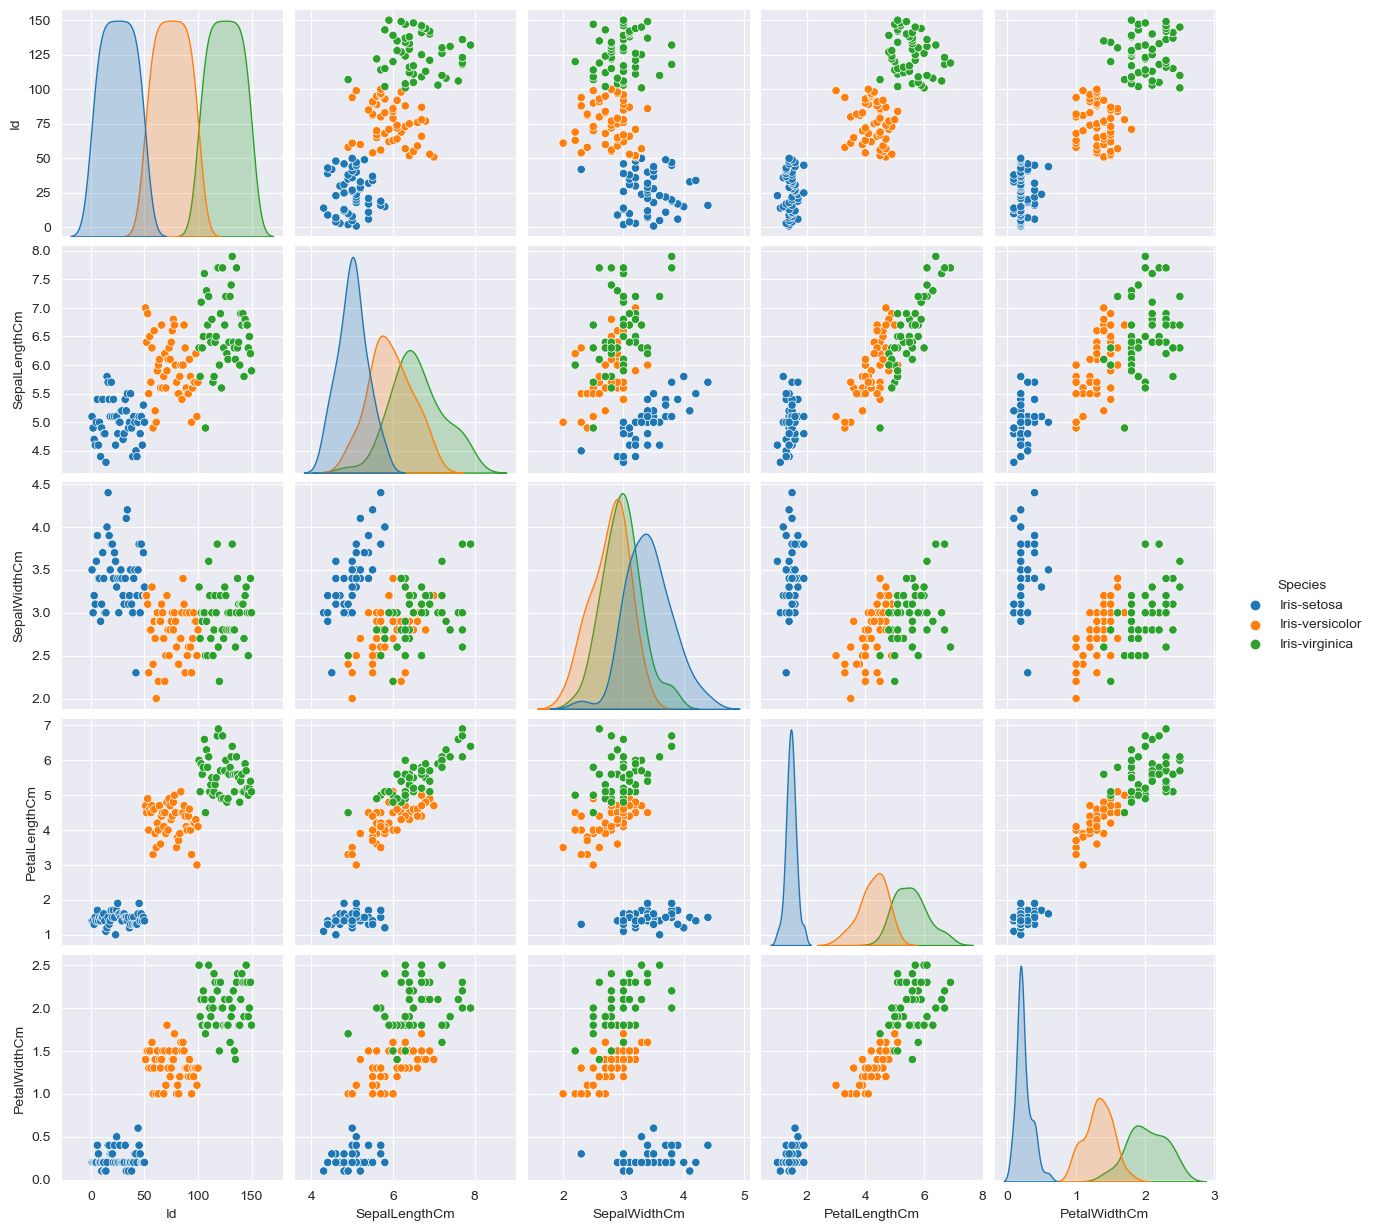

In [14]:
#data visualization
sns.pairplot(df,hue='Species')

In [16]:
#finding optimal value
df_new = df.drop('Species', 1)
df_new.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [19]:
wcss = []

for i in  range(1,6):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 50, n_init =10, random_state =0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

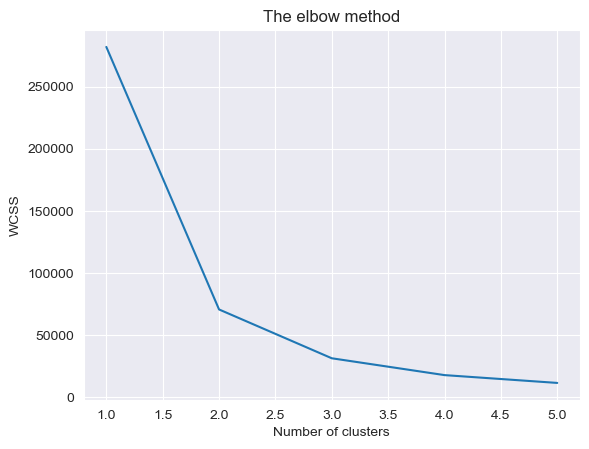

In [20]:
plt.plot(range(1,6),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#silhoutte analysis
range_n_clusters = [3,4,5]

for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_new)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=3, the silhouette score is 0.5816702617893469
For n_clusters=4, the silhouette score is 0.5566141699876032
For n_clusters=5, the silhouette score is 0.5403365650217927


In [24]:
#Building the model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 30, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

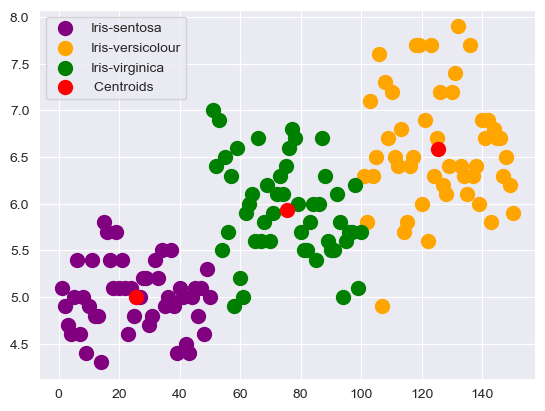

In [25]:
x = df.iloc[:, [0,1,2,3]].values

#visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 100, c = 'purple', label = 'Iris-sentosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = ' Centroids')

plt.legend()

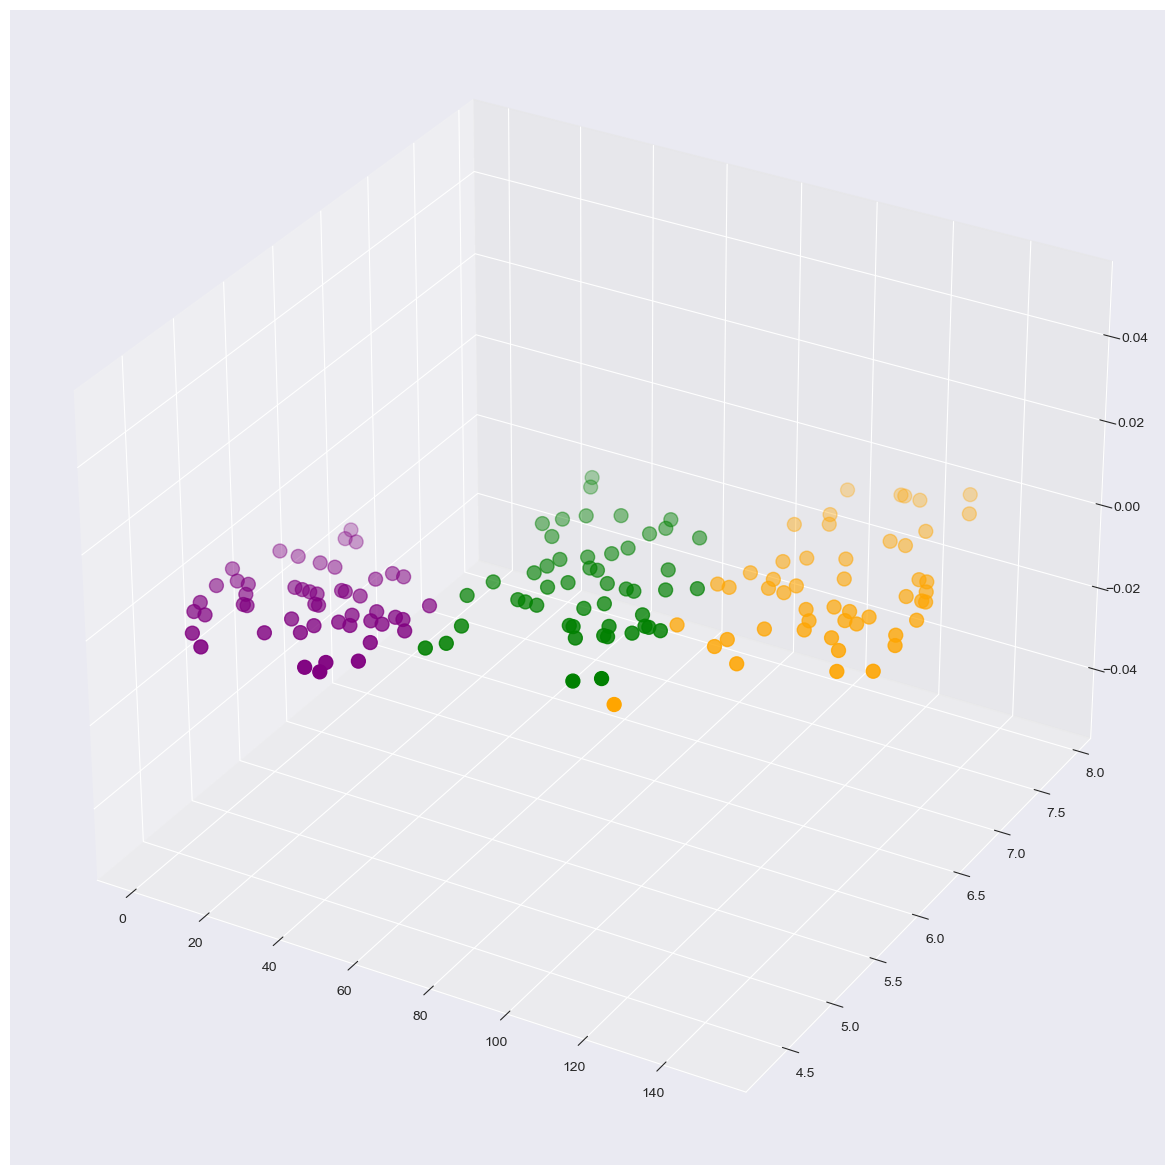

In [26]:
#3d plot

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s = 100, c = 'purple', label = 'Iris-sentosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

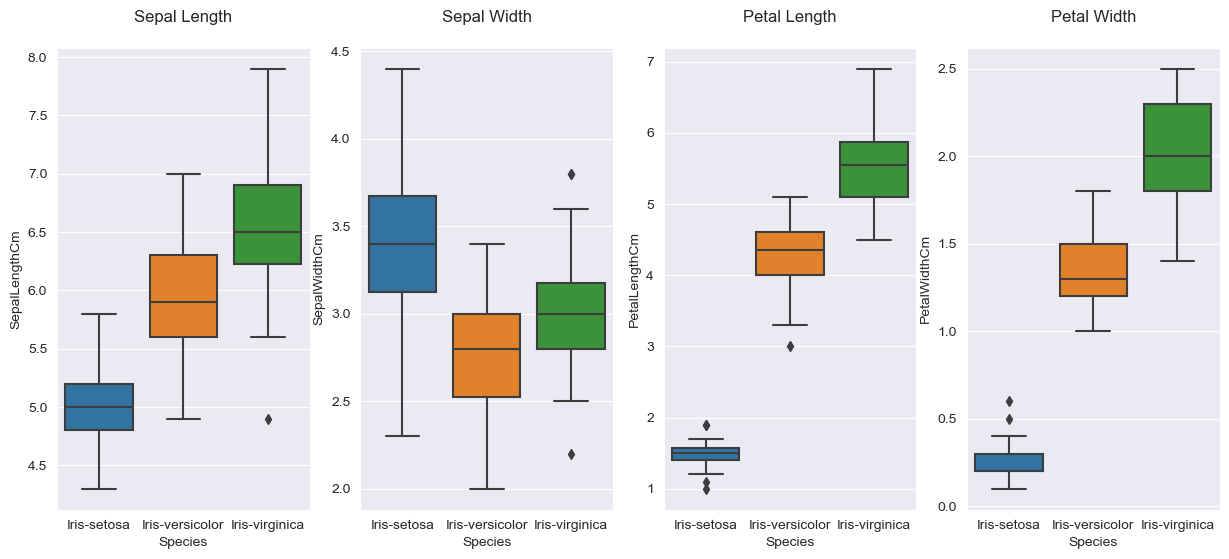

In [27]:
plt.figure(figsize= (15,6))

plt.subplot (1, 4, 1)
sns.boxplot (y = df['SepalLengthCm'], x = df['Species'])
plt. title("Sepal Length\n")

plt.subplot (1,4,2)
sns.boxplot(y = df ['SepalWidthCm'], x = df['Species'])
plt.title("Sepal Width\n")

plt.subplot(1,4,3)
sns.boxplot (y = df['PetalLengthCm'], x = df['Species'])
plt.title("Petal Length\n")

plt.subplot(1,4,4)
sns.boxplot(y = df['PetalWidthCm'], x = df['Species'])
plt.title("Petal Width\n")
plt. show()